<a href="https://colab.research.google.com/github/e-abtahi/Statistical_Analysis_Portfolio/blob/main/Application_Case_Medicon_Dose_Testing/Medicon_Dose_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Context:**

Pharmaceutical company Medicon has manufactured the sixth batch (40,000 units) of COVID-19 vaccine doses. This vaccine was clinically tested last quarter and around 2,00,000 doses of this vaccine have already been given to the people, in five batches. Now, this sixth batch of doses needs to be tested for their time of effect (which is measured as the time taken for the dose to completely cure COVID), as well as for quality assurance (which tells you whether the dose will be able to do a satisfactory job or not). [Please note that this is not a clinical trial, the vaccine has already cleared clinical trials. This batch test is to ensure the quality and effectiveness of the sixth batch] The company wants to plan for the next batch of doses. Let's understand the quality of this(sixth) batch. You are working with the quality assurance team of Medicon and want to understand the quality of the sixth batch.

**Note:** Here, satisfactory job means that the dose is able to completely cure covid and it does not have any side effects.


## **Problem statement**:


From the previous analysis, it is found that a dose is 2 times more likely to produce a satisfactory result than not.

1) The quality assurance team has collected 10 volunteers who were ready for the trial of this new batch and given one dose to each volunteer. Help the team to answer the following questions

a) Plot the probability distribution for the number of unsatisfactory doses.

b) Find the probability that exactly 3 doses will not be able to do a satisfactory job.

c) Find the probability that at most 3 doses will not do the satisfactory job out of 10 selected.

2) The New York city administration wants to buy 20 Doses for Health care workers who were COVID-Positive. They have contacted the company and requested 20 Doses. What is the probability that at least 11 doses will not do a satisfactory job out of 20 doses?

3) Quality assurance team wants to analyze the time of effect for doses. So, they have collected the 50 volunteers with the help of the city administration and given one dose to each volunteer. Data of these 50 doses are in the 'doses.csv' file. Based on this sample, answer the following questions:

a) What is the probability that a dose will take less than 11.5 hours?

b) What is the 90th percentile of time of effect for the doses?

c) For the effectiveness test of the vaccine. Estimate the range in which the population mean (effective time) will lie with a 95% confidence level.

## Import the libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

**The quality assurance team has collected the 10 volunteers who were ready for the trial of this new batch and given one dose to each volunteer. What is the probability that k doses will do a satisfactory job out of 10 doses given to the volunteers?**

The above situation follows the Binomial distribution because we are taking the random sample of 10 doses and checking the probability of exactly 3 will not do a satisfactory job.


Let's check first whether the assumptions of the binomial distribution are satisfied or not.

*  There are only two possible outcomes (success or failure) for each trial – A dose will do a satisfactory job or not (yes or no).

* Number of trials (n) is fixed - A  sample of size 10 is taken. Each dose in the sample represents a trial.

* Each trial is independent of the other trials - It is reasonable to assume that giving dose to each person is independent.

* The probability of success (p) is the same for each trial - The probability of success for each trial (a dose will not do a satisfactory job) is not known.

Let's find the probability of success of each trial (A dose will not do a satisfactory job)


As we already know, the quality assurance teams check on the fifth batch of doses and found that - it is 2 times more likely that a dose will be able to produce a satisfactory result than not.

Let p be the probability that a dose will not do a satisfactory job.

It is 2 times more likely that a dose will be able to produce a satisfactory result than not. So, the probability that a dose will do a satisfactory job is 2p.

According to the rules of probability,

p + 2p = 1

=> 3p = 1

=> p = 1/3

=> p = 0.33


Hence, The probability of success for each trial (a dose will not do a satisfactory job) is 0.33.

## Lets estimate the probability distribution of doses


In [2]:
# declare the sample size in variable n which represents the number of doses given to the volunteers
n=10

In [3]:
# declare p which represents the probability of success, i.e., the probability that a dose will not do a satisfactory job
p=0.33

In [4]:
# declare different number of doses selected in a numpy array
k=np.arange(0,11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
# import the required function
from scipy.stats import binom
# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k = k,n = n, p = p)

In [6]:
binomial

array([1.82283780e-02, 8.97815635e-02, 1.98993465e-01, 2.61364552e-01,
       2.25280640e-01, 1.33150945e-01, 5.46515074e-02, 1.53816609e-02,
       2.84101573e-03, 3.10956945e-04, 1.53157899e-05])

As you can see **binomial** is the array of probabilities for the different number of doses that will not do a satisfactory job. Let us visualize the same in the following plot.

**a) Plot the  probability distribution**


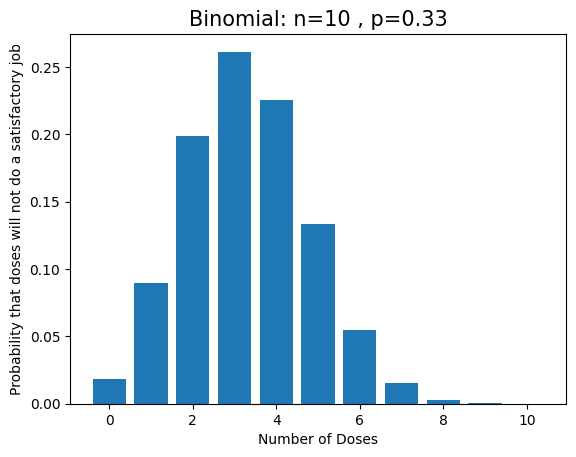

In [7]:
# plot the distribution
plt.bar(k,binomial)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
plt.show()

**b) Find the probability that exactly, 3 doses will not be able to do a satisfactory job.**

In [8]:
binomial[3]

0.2613645515525908

* The probability of exactly 3 doses will not do a satisfactory job is 26.14%.

**c) Find the probability that at most 3 doses will not do the satisfactory job out of 10 selected.**

First, we need to calculate P(X<=3). Here, X is the random variable that represents the number of doses that will not do a satisfactory job.

CDF is used to calculate the cumulative probability.


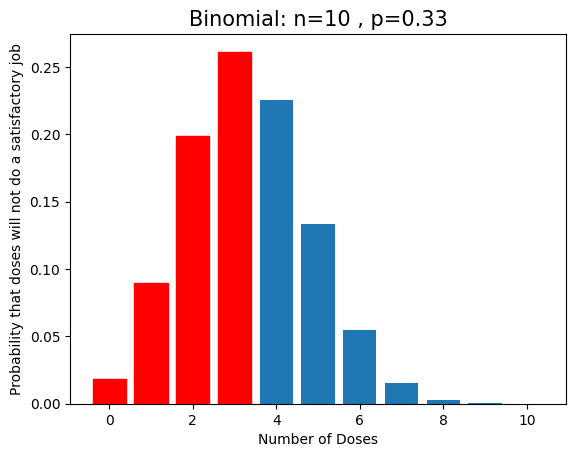

In [9]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl=plt.bar(k,binomial)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
for i in range(0,4):
   barl[i].set_color('r')
plt.show()

In the above graph, the red region represents P(X<=3).

Let's calculate the probability that out of 10 randomly selected doses, at most 3 will not do a satisfactory job. We will use binom.cdf() for this.

In [10]:
# calculate cdf
prob_atmost3 = binom.cdf(k = 3 ,n = n, p = p)
print(prob_atmost3)

0.5683679584925142


*  56.84% is the probability that at most 3 doses will not do a satisfactory job.

**2) The New York city administration wants to buy 20 Doses for Health care workers who were COVID-Positive. They have contacted the company and requested 20 Doses. What is the probability that at least 11 doses will not do a satisfactory job out of 20 doses?**



Let's calculate the probability that at least 11 doses will not do a satisfactory job out of 20 selected.

First, we need to calculate the probability for P(X>=11). Here, X is the random variable that represents doses that will not do a satisfactory job. CDF is used to calculate the cumulative probability.

In [11]:
# declare the sample size in variable n which represents the number of doses selected randomly
n=20
# declare p which represents the probability of success, i.e., the probability that a dose will not do satisfactory job
p=0.33
# declare different number of doses selected in a numpy array
k=np.arange(0,21)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [12]:
# import the required function
from scipy.stats import binom
# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k = k,n = n, p = p)

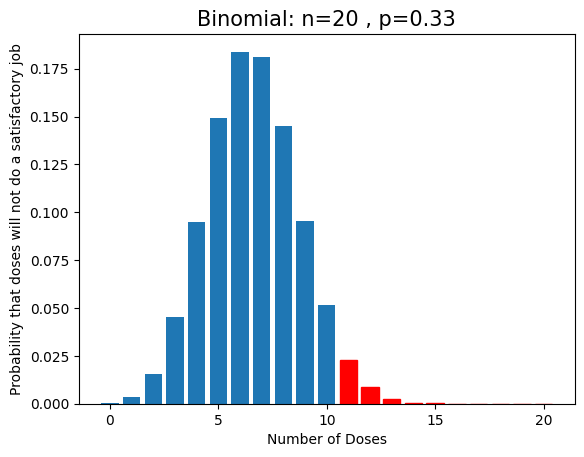

In [13]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl=plt.bar(k,binomial)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will not do a satisfactory job')
for i in range(11,21):
   barl[i].set_color('r')
plt.show()

In the above graph, the red region represents P(X>=11).

Let's calculate the probability that out of 20 randomly selected doses, at least 11 will not do a satisfactory job. We will use binom.cdf() for this.

P(X>=11) = 1 - P(X<=10)

In [14]:
# calculate cdf
prob_atleast11 = 1 - binom.cdf(k = 10, n = n, p = p)
print(prob_atleast11)

0.03499740152648401


* There is 3.5 % chance that at least 11 doses will not do a satisfactory job out of 20 doses

**3) Quality assurance team has collected 50 volunteers with the help of the city administration. Each volunteer is given a dose and the effective time of curing the covid is also monitored. Data for 50 doses is in 'doses.csv'.Based on this sample, Answer the following questions**


## **Data Dictionary**:

We are using the dataset which is randomly generated and having two features

**drung_serial_number**: It represents the serial number of each dose and discrete in nature

**time_of_effect**: It represents the time taken by dose to cure the COVID. It is in hours and continuous in nature.

### Reading the Sample Data into the DataFrame

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

drug = pd.read_csv('/content/drive/MyDrive/doses.csv')
drug.head()

Mounted at /content/drive/


,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6


## Overview of the dataset

In [17]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


* As you can see from the result of the info function there no null values present in any of the columns

Let's calculate the mean and standard deviation of time of effect for the sample doses



In [18]:
# import the required function
from scipy.stats import norm
# estimate the mean and standard deviation of the time of effect for the doses
mu = drug['time_of_effect'].mean()
sigma = drug['time_of_effect'].std()
print('The estimated mean is', round(mu,2))
print('The estimated standard deviation is', round(sigma,2))

The estimated mean is 13.44
The estimated standard deviation is 4.75


### Plotting the Distribution

It will help us analyze the shape of the distribution of time of effect for doses.

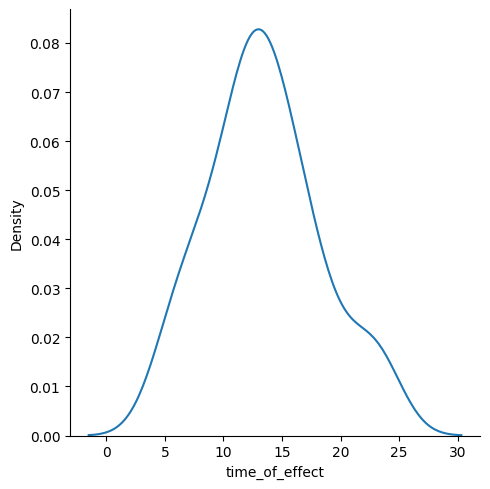

In [19]:
import seaborn as sns
sns.displot(drug['time_of_effect'],kind="kde")

* As you can see in the above plot, the shape of the distribution is not perfectly normal because we just have 50 observations in the sample. But, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.



**a) Calculate the probability that a dose will take  less than 11.5 hours**

In [20]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob = norm.cdf(11.5, mu, sigma)
print('The probability that a dose will take less than 11.5 is', round(prob, 4))

The probability that a dose will take less than 11.5 is 0.3412


**b) What is the 90th percentile of the time of effect for doses?**

In [21]:
perc_90th = norm.ppf(0.90, mu, sigma)

In [22]:
print('The 90th percentile of the time of effect for doses is', round(perc_90th, 2))

The 90th percentile of the time of effect for doses is 19.52


**c) For the effectiveness test of the vaccine, based on this sample of 50 doses taken by the quality assurance team. Estimate the range in which the population mean (effective time) will lie with a 95% confidence level.**


A sample of size (n) 50 is taken which is sufficiently large (n>30). According to the central limit theorem, sampling distribution of sufficiently large distribution will follow a normal distribution.



In [23]:
#import the required function
from scipy.stats import t

#set the values of sample mean and sample standard deviation
x_bar, s = mu, sigma

# set the value of sample size and degrees of freedom
n = 50
k = n - 1

# construct the confidence interval
np.round(t.interval(0.95, df = k, loc = x_bar, scale = s/np.sqrt(n)), 2)

array([12.09, 14.79])

* 95% of the time, the mean effective time  of doses will be between 12.09 hours and 14.79 hours.